(ivp-chapter)=
# Initial Value Problems

**Learning Outcomes**

On successful completion of this chapter readers will be able to:

- identify an [initial value problem](ivp-definition);
- approximate a function using the [Taylor series](taylor-series-definition);
- derive the [Euler method](euler-method-definition) and apply it to solve first-order ordinary differential equations;
- express a [higher-order ordinary differential equation](higher-order-odes-section) as a system of first-order ordinary differential equation;
- apply an ODE solver to [solve a system of ordinary differential equation](solving-systems-of-odes-section).

---
(ode-section)=
## Ordinary Differential Equations (ODEs)

````{admonition} Definition: Ordinary Differential Equation
:class: note
:name: ode-definition

An Ordinary Differential Equation (ODE) is an equation of the form

$$y^{(n)} = f(t, y, y', y'', \ldots, y^{(n-1)}),$$

where $y = y(t)$ is some function of the independent variable $t$, $y^{(n)}$ is the $n$th derivative of $y$ and $f$ is some function of $t$, $y$ and its derivatives.
````

The solution of an ODE is a function $y=y(t)$ that satisfies the ODE over the domain of $t$. For example, consider the following ODE

$$ y' = y,$$ (simple-ode)

where $t \in \mathbb{R}$. Rewriting this using Leibniz notation and integrating both sides we have

\begin{align*}
    \frac{\mathrm{d} y}{\mathrm{d} t} & = y \\
    \frac{\mathrm{d} y}{y} &= \mathrm{d} t \\
    \int \frac{1}{y} \mathrm{d} y &= \int 1 \mathrm{d} t \\
    \ln (y) + c_1 &= t + c_2 \\
    \ln (y) &= t + c_1 + c_2 \\
    y &= e^{t + c},
\end{align*}

where $c = c_1 + c_2$ is some constant. The solution can be verified by differentiating $y$ and check that it satisfies the original ODE. This solution has been plotted for various values of the constant $c$. Note that there are an infinite number of solutions since $c$ can be any value. 

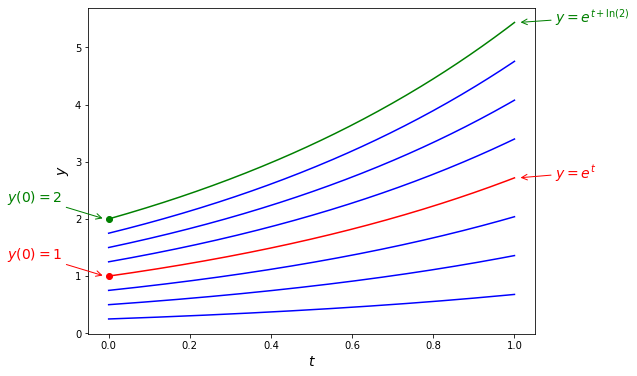

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 200)
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(1, 8):
    if i == 4:
        continue
    plt.plot(t, np.exp(t + np.log(i*0.25)), "b")
plt.plot(t, np.exp(t), "r")
plt.plot(t, np.exp(t + np.log(2)), "g")
plt.plot(0, 1, "ro")
plt.plot(0, 2, "go")
plt.annotate("$y(0)=1$", xy=(-0.01, 1), xytext=(-0.25, 1.3), fontsize=14, color="r",
             arrowprops=dict(arrowstyle='->',shrinkA=2, shrinkB=2, ec="r"))
plt.annotate("$y = e^t$", xy=(1.01, np.exp(1)), xytext=(1.1, np.exp(1)), fontsize=14, color="r",
            arrowprops=dict(arrowstyle="->", shrinkA=2, shrinkB=2, ec="r"))
plt.annotate("$y(0)=2$", xy=(-0.01, 2), xytext=(-0.25, 2.3), fontsize=14, color="g",
             arrowprops=dict(arrowstyle='->',shrinkA=2, shrinkB=2, ec="g"))
plt.annotate("$y = e^{t+\ln(2)}$", xy=(1.01, np.exp(1 + np.log(2))), xytext=(1.1, np.exp(1 + np.log(2))), fontsize=14, color="g",
            arrowprops=dict(arrowstyle="->", shrinkA=2, shrinkB=2, ec="g"))
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.show()

However, if we know that the value of the solution $y$ for some $t$ then we can calculate $c$. For example, if the solution to the ODE from equation {eq}`simple-ode` is known to be $y(0) = \alpha$ then

\begin{align*}
    \alpha &= e^{0 + c} = e^c \\
    \therefore c &= \ln(\alpha)
\end{align*}

so the ODE has the solution

\begin{align*}
    y &= e^{t + \ln(\alpha)}.
\end{align*}

Different values of $\alpha$ in the initial solution $y(0)=\alpha$ give different unique solutions to the ODE. Problems of this type are known as **initial value problems**.

````{admonition} Definition: Initial value problem
:class: note
:name: ivp-definition

An Initial Value Problem (IVP) is an ODE where the initial solution at the lower boundary of the domain is known. For example,
\begin{align*}
    y' = f(t,y), \qquad t\in [a ,b ], \qquad y(a) = \alpha.
\end{align*}
Here a first-order ODE $y'=f(t,y)$ is defined over the domain $t\in [a ,b]$ and the initial solution $y(a)$ is the known value $\alpha$. 
````

Unfortunately, for most real world practical applications initial value problems cannot be solved using analytical methods so instead we use numerical methods to approximate the solution.